In [ ]:
# 4. Machine learning classifiers examples in healthcare

In [68]:
# 1. Exploratory data analysis

# 1.1 Reading dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
colnames = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv('diabetes.csv', skiprows = 1, header = None, names = colnames)
#Dataset contains different measures and based on them, patient suffers from diabetes or not.
#With seaborn.boxplot we can plot different variables and see how the variable is distributed.
#Interpreting plots we can predict whether a patient has a diabetes or not.
#Plotting many variables same time interpreting becomes easier, since we can study how the
#variables are connected to each other. For instance, if patient has a high blood pressure, has a high BMI-index
#and glucose levels are high, we can estimate that he/she might have diabetes.

In [69]:
# 1.2 Target feature's value distribution
df_outcome = df['Outcome']
outcome_val = df_outcome.value_counts()
print('Number of patients that do not suffer from diabetes:', outcome_val[0])
print('Number of patients that suffer from diabetes:', outcome_val[1])
#Target feature ('Outcome': Patient suffers from diabetes (1) or not (0)). 
# From the 768 instances, 268 has a diabetes and 500 don't.

Number of patients that do not suffer from diabetes: 500
Number of patients that suffer from diabetes: 268


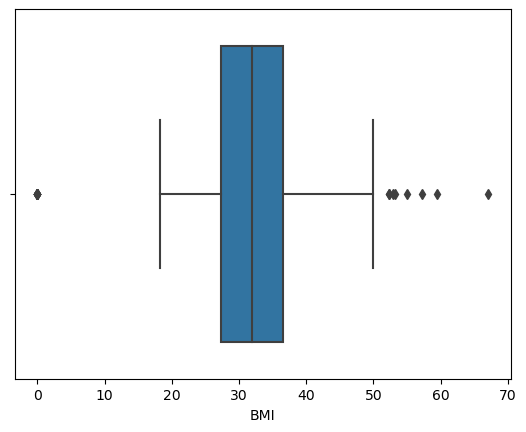

In [70]:
# 1.3 Revealing outliers
#df_pregnancies = sns.boxplot(x = df['Pregnancies'])
#df_glucose = sns.boxplot(x = df['Glucose'])
#df_bp = sns.boxplot(x = df['BloodPressure'])
#df_st = sns.boxplot(x = df['SkinThickness'])
#df_insulin = sns.boxplot(x = df['Insulin'])
df_bmi = sns.boxplot(x = df['BMI'])
#df_dpf = sns.boxplot(x = df['DiabetesPedigreeFunction'])
#df_age = sns.boxplot(x = df['Age'])

#With seaborn.boxplot we can reveal variable outliers. Plot shows distribution of the variable and
#so we can detect deviations. For example BMI boxplot below shows the distribution. We can see
#that some patients have very low BMI (under 20) and some have very high BMI (over 45).
#those tailvalues represent the outliers of the BMI variable. Other variables/features have
#also tailvalues.

In [ ]:
# 1.4 Feature scaling
#We could use rescaling, in which new value is calculated via minimum and maximum of the feature 
#dataset. In addition, z-score calculations would help to scale features to 0-1 scale.
#Logistic regression would be a good method for rescaling also.

In [71]:
# 2. Extensive EDA
from dataprep.eda import create_report
report = create_report(df)
report.save('extensive_EDA')
# 2.1
#We can see from the generated extensive_EDA.html file that the report gives additional information
#about every variable and shows how much memory it takes. Moreover, report gives statistics about 
#dataset and insights. Interesting is that the report is pretty comprehensive and detailed.

  0%|          | 0/1676 [00:00<?, ?it/s]

Report has been saved to extensive_EDA.html!


In [151]:
# 3. Building the classifier
from sklearn.ensemble import RandomForestClassifier
# 3.1 Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, train_size = 0.7, random_state = 42, stratify = df['Outcome'])
X_train = train.drop('Outcome',axis=1)
y_train = train['Outcome'].copy()
X_test = test.drop('Outcome',axis=1)
y_test = test['Outcome'].copy()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# 3.2 Stratification
#In data-analysis stratification means that each set is represented equally.
print(pd.value_counts(y_test)) #For instance, the y_test dataset contains roughly
#equal amount of zeros and ones (150 and 81). It is important that datasets are
#comparable and fair with equal amounts of data.

# 3.3 Preprocessing X_train dataset
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train, y_train)
X_scaled = scaler.transform(X_train)
#StandardScaler is good option to scale features to the same range. Another option 
#in scikit-learn function would be PCA or normalization.

(537, 8)
(231, 8)
(537,)
(231,)
0    150
1     81
Name: Outcome, dtype: int64


In [164]:
# 3.4 Fitting pipeline with training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
rf_clf = RandomForestClassifier(max_depth=5, n_estimators=100, min_samples_split=8,
min_samples_leaf = 3, max_features= 'auto', bootstrap= True, random_state=42)
std_scaler = StandardScaler()
clf_pipe = Pipeline([('scaler', std_scaler), ('clf', rf_clf)])
clf_pipe.fit(X_train, y_train)
print('Accurary of predictive model (Random Forest):',clf_pipe.score(X_test, y_test))

Accurary of predictive model (Random Forest): 0.7489177489177489


In [189]:
# 4. Comparing several classifiers
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state = 42)
lr_clf_pipe = Pipeline([('scaler', std_scaler), ('clf', lr_clf)])
lr_clf_pipe.fit(X_train, y_train)
print('Logistic regression model score:',lr_clf_pipe.score(X_test,y_test))

#Support vector machine (Linear Kernel) 
from sklearn.svm import LinearSVC
svc_clf = LinearSVC(random_state = 42)
svc_clf_pipe = Pipeline([('scaler', std_scaler), ('clf', svc_clf)])
svc_clf_pipe.fit(X_train, y_train)
print('Support vector machine model score:',svc_clf_pipe.score(X_test,y_test))

#Decision tree
from sklearn.tree import DecisionTreeClassifier
dc_clf = DecisionTreeClassifier(random_state = 42)
dc_clf_pipe = Pipeline([('scaler', std_scaler), ('clf', dc_clf)])
dc_clf_pipe.fit(X_train, y_train)
print('Decision tree model score:',dc_clf_pipe.score(X_test,y_test))

#Adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier(random_state = 42)
ab_clf_pipe = Pipeline([('scaler', std_scaler), ('clf', ab_clf)])
ab_clf_pipe.fit(X_train, y_train)
print('Adaptive boosting model score:',ab_clf_pipe.score(X_test,y_test))

from sklearn.model_selection import GridSearchCV
parameters = {}
grid = GridSearchCV(estimator = ab_clf, param_grid = parameters, cv=5)
grid.fit(X_train, y_train)
df_results = pd.DataFrame(grid.cv_results_)
print(df_results)
# 4.1
#We can see that decision tree model score is the most accurate model.
#Logistic regression is close to random forest model accurary.

Logistic regression model score: 0.7445887445887446
Support vector machine model score: 0.7359307359307359
Decision tree model score: 0.7619047619047619
Adaptive boosting model score: 0.7402597402597403


/Users/aleksisormunen/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


   mean_fit_time  std_fit_time  mean_score_time  std_score_time params  \
0       0.081384       0.01026         0.008941        0.000802     {}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.722222           0.787037           0.785047           0.728972   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.728972          0.75045        0.029172                1  


In [193]:
# 5. Bonus
from openpyxl import Workbook
df_results_new_df = pd.DataFrame(df_results)
print(df_results_new_df)
df_results_new_df.to_excel(r'df_results_bonus.xlsx', index=False, engine = 'openpyxl')

   mean_fit_time  std_fit_time  mean_score_time  std_score_time params  \
0       0.081384       0.01026         0.008941        0.000802     {}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.722222           0.787037           0.785047           0.728972   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.728972          0.75045        0.029172                1  
